### Import the libraries and dataset

In [1]:
import matplotlib.pyplot as plt  
%matplotlib inline    
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#### Meta data (Attribute Information:)

In [4]:
# age
# sex
# chest pain type (4 values)
    ### cp: chest pain type
    ### Value 1: typical angina
    ### Value 2: atypical angina
    ### Value 3: non-anginal pain
    ### Value 4: asymptomatic

# resting blood pressure (in mm Hg on admission to the hospital)
# serum cholestoral in mg/dl
# fasting blood sugar > 120 mg/dl
# resting electrocardiographic results (values 0,1,2)
    ### Value 0: normal
    ### Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    ### Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
# maximum heart rate achieved
# exercise induced angina (1 = yes; 0 = no)
# oldpeak = ST depression induced by exercise relative to rest
# the slope of the peak exercise ST segment
    ### Value 1: upsloping
    ### Value 2: flat
    ### Value 3: downsloping

# number of major vessels (0-3) colored by flourosopy
# thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
# target 0 less chance of heart attack 1= more chance for heart attack 

In [5]:
data.shape    # shape is attribute not method without () 

(1025, 14)

In [6]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 1025
Number of Columns 14


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
data_dup = data.duplicated().any()
data_dup 


True

In [10]:
data = data.drop_duplicates()

In [11]:
data.shape

(302, 14)

In [12]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


#### Correlation Matrix

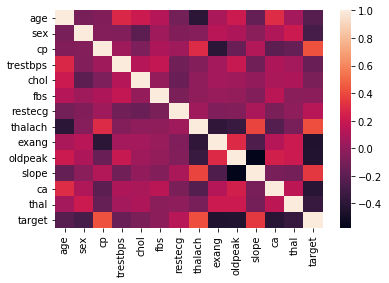

In [14]:

sns.heatmap(data.corr())

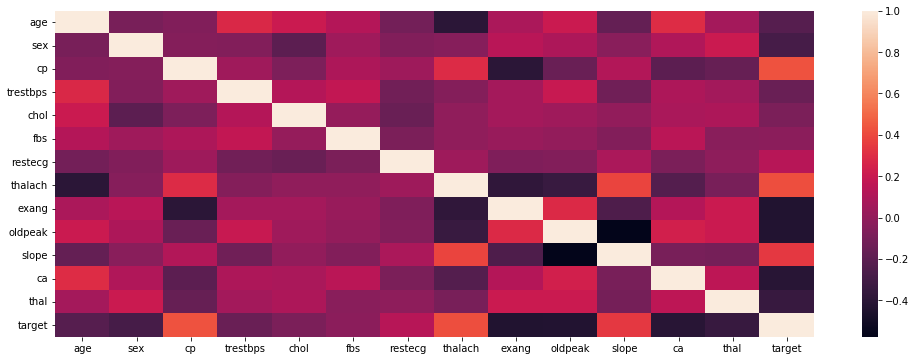

In [15]:
plt.figure(figsize = (17,6))
sns.heatmap(data.corr())

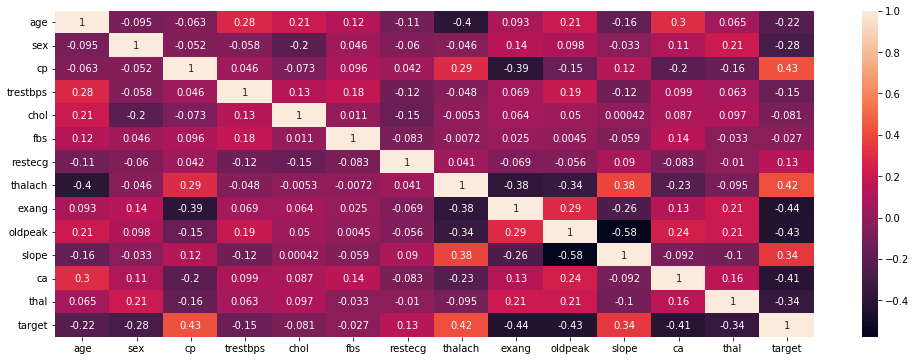

In [16]:
plt.figure(figsize = (17,6))
sns.heatmap(data.corr(),annot = True)

#### How many people have heart disease and how many don't?

In [17]:
data['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

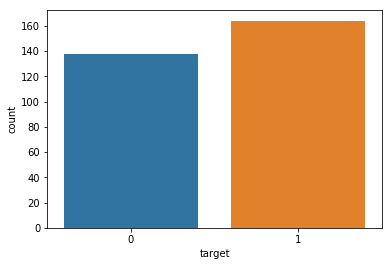

In [52]:
sns.countplot(x= data['target'])
plt.show()

#### How many male and female in dataset?

In [19]:
data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

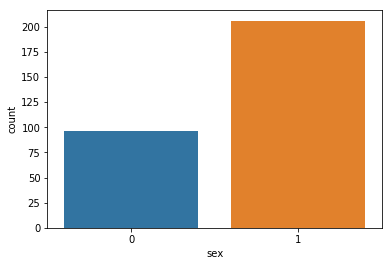

In [53]:
sns.countplot(x= data['sex'])
plt.show()

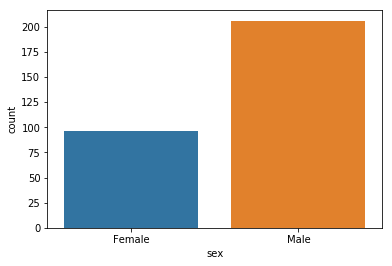

In [54]:
sns.countplot(x= data['sex'])
plt.xticks([0,1],['Female','Male'])
plt.show()

#### Find distribution according to the target

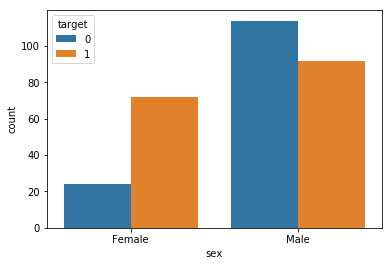

In [22]:
sns.countplot(x= 'sex',hue = 'target',data = data)
plt.xticks([0,1],['Female','Male'])
plt.show()

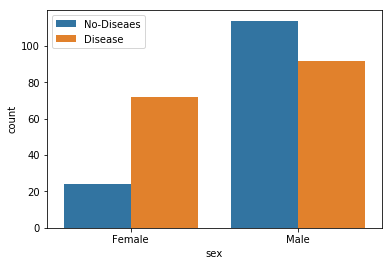

In [23]:
sns.countplot(x= 'sex',hue = 'target',data = data)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No-Diseaes','Disease'])
plt.show()

#### Age distribution 

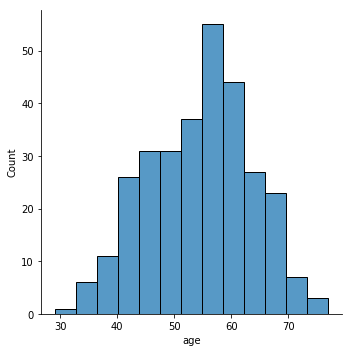

In [24]:
sns.displot(data['age'])

C:\Users\DR MAHMOUD\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


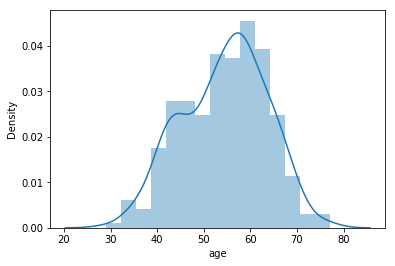

In [25]:
sns.distplot(data['age'],bins=15)

#### Check pain chest 

In [26]:
# chest pain type (4 values)
    ### cp: chest pain type
    ### Value 1: typical angina
    ### Value 2: atypical angina
    ### Value 3: non-anginal pain
    ### Value 4: asymptomatic

C:\Users\DR MAHMOUD\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


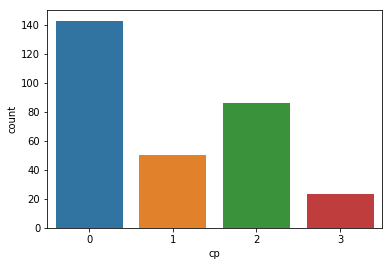

In [27]:
sns.countplot(data['cp'])

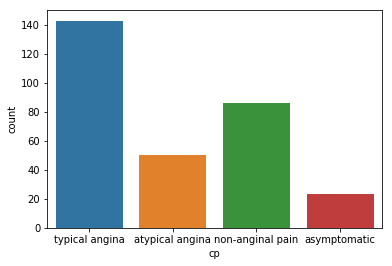

In [55]:
sns.countplot( x = data['cp'])
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.show()

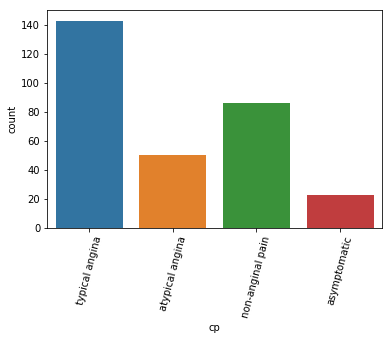

In [56]:
sns.countplot(x = data['cp'])
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xticks(rotation = 75)
plt.show()

#### Show chest pain distribution as per target 

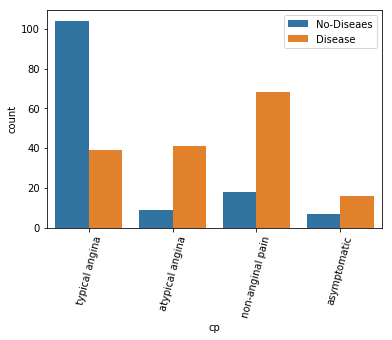

In [30]:
sns.countplot(x= 'cp',hue = 'target',data = data)
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xticks(rotation = 75)
plt.legend(labels=['No-Diseaes','Disease'])
plt.show()

#### Show fast blood sugar distribution according to target

In [31]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

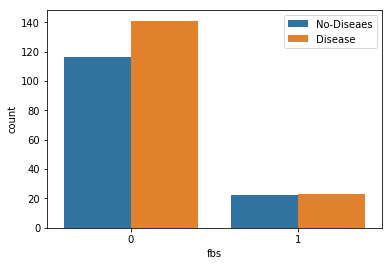

In [32]:
sns.countplot(x= 'fbs',hue = 'target',data = data)
plt.legend(labels=['No-Diseaes','Disease'])
plt.show()

#### Check resting blood pressure distribution 

In [33]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

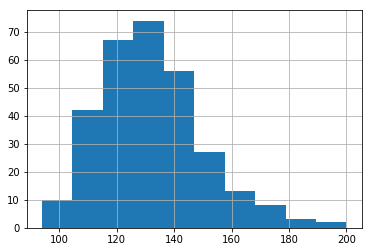

In [34]:
data['trestbps'].hist()

#### Resting blood pressure as per Sex

##### FacetGrid class helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.A FacetGrid can be drawn with up to three dimensions ? row, col, and hue.

###### Kernel Density Estimate (KDE) Plot and Kdeplot allows us to estimate the probability density function of the continuous or non-parametric from our data set curve in one or more dimensions it means we can create plot a single graph for multiple samples which helps in more efficient data visualization.

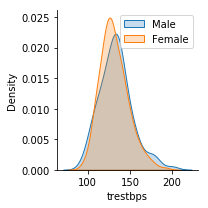

In [35]:
g = sns.FacetGrid(data,hue="sex")
g.map(sns.kdeplot,'trestbps',shade = True)
plt.legend(labels=['Male','Female'])

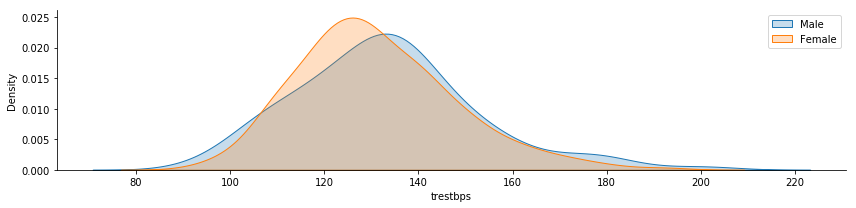

In [36]:
g = sns.FacetGrid(data,hue="sex",aspect =4)
g.map(sns.kdeplot,'trestbps',shade = True)
plt.legend(labels=['Male','Female'])

#### Distribution of serum cholestoral

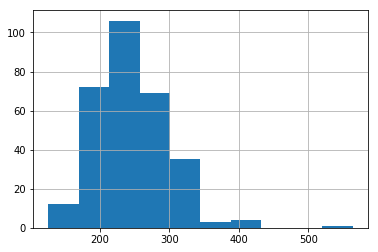

In [37]:
data['chol'].hist()

#### Plot continuous variables

In [38]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [43]:
cat_var = []
con_var = []

for column in data.columns:
    if data[column].nunique() <=10 :
       cat_var.append(column) 
    else:
        con_var.append(column)

In [44]:
cat_var

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [45]:
con_var

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

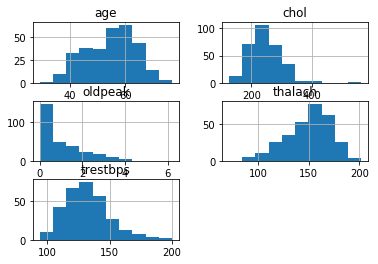

In [49]:
data.hist(con_var)
plt.show()

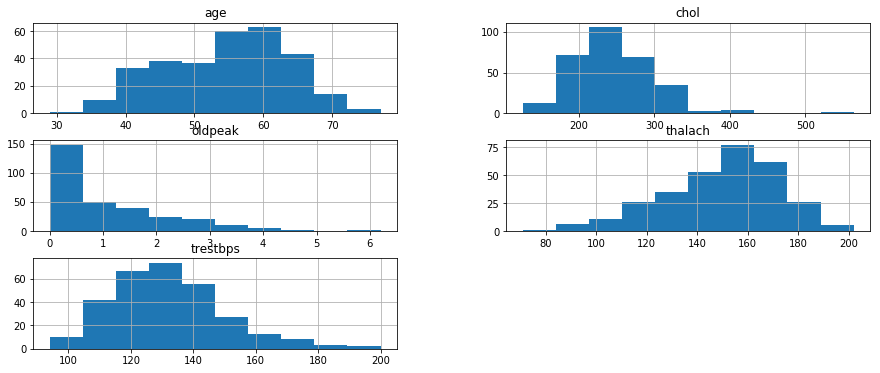

In [48]:
data.hist(con_var,figsize = (15,6))
plt.show()

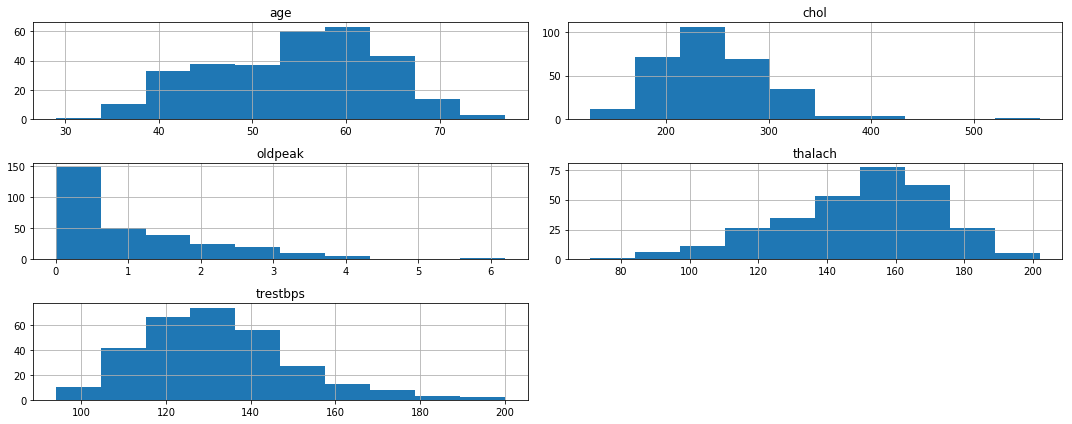

In [50]:
data.hist(con_var,figsize = (15,6))
plt.tight_layout()
plt.show()